In [183]:
import pandas as pd

weather = pd.read_csv("local_weather.csv")
#We want to convert date from object to date time
weather.dtypes

STATION     object
NAME        object
DATE        object
ACMH       float64
ACSH       float64
AWND       float64
DAPR       float64
FMTM       float64
FRGT       float64
MDPR       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX       float64
TMIN       float64
TSUN       float64
WDF1       float64
WDF2       float64
WDF5       float64
WDFG       float64
WSF1       float64
WSF2       float64
WSF5       float64
WSFG       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT07       float64
WT08       float64
WT09       float64
WT16       float64
WT18       float64
dtype: object

In [184]:
weather['DATE'] =  pd.to_datetime(weather['DATE'])
weather.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
ACMH              float64
ACSH              float64
AWND              float64
DAPR              float64
FMTM              float64
FRGT              float64
MDPR              float64
PGTM              float64
PRCP              float64
SNOW              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
TSUN              float64
WDF1              float64
WDF2              float64
WDF5              float64
WDFG              float64
WSF1              float64
WSF2              float64
WSF5              float64
WSFG              float64
WT01              float64
WT02              float64
WT03              float64
WT04              float64
WT05              float64
WT07              float64
WT08              float64
WT09              float64
WT16              float64
WT18              float64
dtype: object

In [185]:
from datetime import datetime
weather = weather[(weather['DATE'] >datetime(1962,1,1)) & (weather['DATE']<datetime(2022,1,1))]
weather

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
732,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
733,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
734,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
736,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1962-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16826,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2021-12-26,NaN,NaN,11.41,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16827,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2021-12-27,NaN,NaN,14.76,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16828,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2021-12-28,NaN,NaN,6.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16829,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2021-12-29,NaN,NaN,10.07,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
#We obtain the columns we care about
relevant_weather_info= weather[["DATE","PRCP", "TMAX", "TMIN"]].copy()
relevant_weather_info.columns = ["date","precip", "max_temp","min_temp"]
relevant_weather_info

,date,precip,max_temp,min_temp
732,1962-01-02,0.00,51.0,38.0
733,1962-01-03,0.00,55.0,40.0
734,1962-01-04,0.00,60.0,35.0
735,1962-01-05,0.00,59.0,41.0
736,1962-01-06,0.00,62.0,36.0
...,...,...,...,...
16826,2021-12-26,0.14,51.0,40.0
16827,2021-12-27,0.09,51.0,44.0
16828,2021-12-28,0.01,48.0,41.0
16829,2021-12-29,0.51,51.0,43.0


In [187]:
#Handling null values for precipitation. Since it does not rain around 83% of the time
# I  have chosen to replace null precip values with 0 based on these probabilities.

relevant_weather_info["precip"].value_counts() / relevant_weather_info.shape[0]


0.00    0.808994
0.01    0.026710
0.02    0.011678
0.03    0.007268
0.04    0.006025
          ...   
1.05    0.000062
1.50    0.000062
1.38    0.000062
1.95    0.000062
1.02    0.000062
Name: precip, Length: 173, dtype: float64

In [188]:
relevant_weather_info["precip"] = relevant_weather_info["precip"].fillna(0)


In [189]:
#Handling null values for min and max temp


relevant_weather_info.dropna(inplace=True)


<AxesSubplot:xlabel='date'>

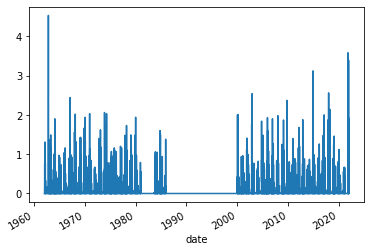

In [190]:
#Plotting precip amounts each year
#There are some outliers
relevant_weather_info["precip"].groupby(relevant_weather_info['date']).sum().plot()

In [191]:
#Machine Learning model
#We want to predict the max temp in the future so our target should be tomorrow's temperature.

relevant_weather_info["target_temp"] = relevant_weather_info.shift(-1)["max_temp"]
relevant_weather_info


,date,precip,max_temp,min_temp,target_temp
732,1962-01-02,0.00,51.0,38.0,55.0
733,1962-01-03,0.00,55.0,40.0,60.0
734,1962-01-04,0.00,60.0,35.0,59.0
735,1962-01-05,0.00,59.0,41.0,62.0
736,1962-01-06,0.00,62.0,36.0,67.0
...,...,...,...,...,...
16826,2021-12-26,0.14,51.0,40.0,51.0
16827,2021-12-27,0.09,51.0,44.0,48.0
16828,2021-12-28,0.01,48.0,41.0,51.0
16829,2021-12-29,0.51,51.0,43.0,53.0


In [192]:
#We need to get rid of the last row because there can't be a target temp

relevant_weather_info=relevant_weather_info.iloc[:-1,:].copy()


In [193]:
#del relevant_weather_info['date']
#We use Ridge Rergression to prevent overfitting. We train model on data before 2021 and test on data after 2021
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)
predictors = ["precip", "max_temp", "min_temp"]
train =relevant_weather_info[relevant_weather_info['date']<'2021-01-01']
test=relevant_weather_info[relevant_weather_info['date']>'2021-01-01']
train


,date,precip,max_temp,min_temp,target_temp
732,1962-01-02,0.00,51.0,38.0,55.0
733,1962-01-03,0.00,55.0,40.0,60.0
734,1962-01-04,0.00,60.0,35.0,59.0
735,1962-01-05,0.00,59.0,41.0,62.0
736,1962-01-06,0.00,62.0,36.0,67.0
...,...,...,...,...,...
16462,2020-12-27,0.00,63.0,44.0,61.0
16463,2020-12-28,0.10,61.0,42.0,60.0
16464,2020-12-29,0.00,60.0,39.0,56.0
16465,2020-12-30,0.07,56.0,36.0,62.0


In [194]:
test

,date,precip,max_temp,min_temp,target_temp
16468,2021-01-02,0.14,57.0,51.0,56.0
16469,2021-01-03,0.00,56.0,49.0,62.0
16470,2021-01-04,0.36,62.0,46.0,59.0
16471,2021-01-05,0.00,59.0,42.0,59.0
16472,2021-01-06,0.03,59.0,40.0,59.0
...,...,...,...,...,...
16825,2021-12-25,1.02,53.0,45.0,51.0
16826,2021-12-26,0.14,51.0,40.0,51.0
16827,2021-12-27,0.09,51.0,44.0,48.0
16828,2021-12-28,0.01,48.0,41.0,51.0


In [195]:
#Create the model and check its MSE
reg.fit(train[predictors], train["target_temp"])
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_squared_error

mean_squared_error(test["target_temp"], predictions)

21.2598765545744

In [196]:
#Combine actual with predictions but first covnert predictions(currently a numpy array) to Pandas Series
combined = pd.concat([test["target_temp"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined


,actual,predictions
16468,56.0,59.302276
16469,62.0,58.530341
16470,59.0,61.530115
16471,59.0,59.440615
16472,59.0,59.017958
...,...,...
16825,51.0,53.430118
16826,51.0,53.016655
16827,48.0,53.840151
16828,51.0,51.318382


<AxesSubplot:>

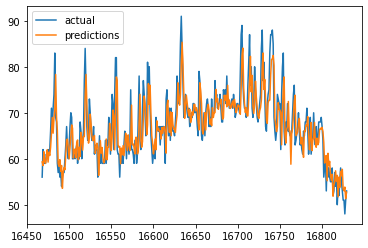

In [197]:
combined.plot()
#Our  predicions tend to be lower than actual

In [231]:
#To make things simpler create a prediciton function
def predict_weather(predictors, weather_ifo, reg):
    relevant_weather_info.dropna(inplace=True)
    train =relevant_weather_info[relevant_weather_info['date']<'2021-01-01']
    test=relevant_weather_info[relevant_weather_info['date']>'2021-01-01']
    reg.fit(train[predictors], train["target_temp"])
    predictions = reg.predict(test[predictors])
    error = mean_squared_error(test["target_temp"], predictions)
    combined = pd.concat([relevant_weather_info["date"],test["target_temp"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["date","actual", "predictions"]
    return error, combined

In [232]:
#Creating more predictors can reduce error. Rolling monthly averages of temperatures could be a predictor.
relevant_weather_info["month_max"] = relevant_weather_info["max_temp"].rolling(30).mean()
relevant_weather_info

,date,precip,max_temp,min_temp,target_temp,month_max,month_day_max,max_min
848,1962-04-28,0.00,59.0,48.0,63.0,NaN,1.153672,1.229167
849,1962-04-29,0.00,63.0,42.0,66.0,NaN,1.081481,1.500000
850,1962-04-30,0.00,66.0,44.0,67.0,NaN,1.034343,1.500000
851,1962-05-01,0.00,67.0,46.0,63.0,NaN,1.023881,1.456522
852,1962-05-02,0.00,63.0,51.0,70.0,NaN,1.091534,1.235294
...,...,...,...,...,...,...,...,...
16825,2021-12-25,1.02,53.0,45.0,51.0,58.066667,1.095597,1.177778
16826,2021-12-26,0.14,51.0,40.0,51.0,57.633333,1.130065,1.275000
16827,2021-12-27,0.09,51.0,44.0,48.0,57.066667,1.118954,1.159091
16828,2021-12-28,0.01,48.0,41.0,51.0,56.400000,1.175000,1.170732


In [233]:
#Additionally we could use percent difference betweeen our current max temp and monthly rolling averages as predictor
#We can also compare between min temp and max temp on that day which could give information on what temps will be the next day
relevant_weather_info["month_day_max"] = relevant_weather_info["month_max"] / relevant_weather_info["max_temp"]

relevant_weather_info["max_min"] = relevant_weather_info["max_temp"] / relevant_weather_info["min_temp"]

In [234]:
#Reset our new predictors
predictors = ["precip", "max_temp", "min_temp", "month_day_max", "max_min"]

In [235]:
#Adding rolling monthly averages decreased our error
error, combined = predict_weather(predictors,relevant_weather_info, reg)
error

20.830701380911474

In [236]:
#Here are how our predictors are correllated with iur target temp. As expected the previous max temps have the highest correlation with predicted
relevant_weather_info.corr()["target_temp"]


precip          -0.206927
max_temp         0.820637
min_temp         0.595130
target_temp      1.000000
month_max        0.688987
month_day_max   -0.419780
max_min          0.044620
Name: target_temp, dtype: float64

In [241]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()
combined.sort_values("date", ascending=False).head(29)

,date,actual,predictions,diff
16829,2021-12-29,53.0,52.838788,0.161212
16828,2021-12-28,51.0,52.039079,1.039079
16827,2021-12-27,48.0,54.020580,6.020580
16826,2021-12-26,51.0,53.603353,2.603353
16825,2021-12-25,51.0,53.869512,2.869512
16824,2021-12-24,53.0,57.264847,4.264847
16823,2021-12-23,55.0,56.229921,1.229921
16822,2021-12-22,58.0,57.132512,0.867488
16821,2021-12-21,55.0,54.584692,0.415308
16820,2021-12-20,52.0,56.450882,4.450882


In [ ]:
'''Result: We used intiial predictors to predct future max temperatures using past past temperatures from a 60 year time span.
We added more predictors such as rolling monthly average, and ratio of max to min temp per day to reduce this error.
'''